# 7.1 회귀

## 7.1.1 인공 신경망

### 인공 신경망은 퍼셉트론이라 불리는 단층 신경망이 좀 더 발전된 구조
### 퍼셉트론은 다양한 독립변수를 입력받아 개별 가중치를 적용하고 입력값과 가중치를 곱해 합한 값에 절편을 더한 값인 z가 임계치를 넘어가면 1, 그렇지 않으면 0을 출력하는 활성화 함수를 갖는 형태
### 한 층의 퍼셉트론으로는 XOR문제를 해결할 수 없음. 따라서 다층 퍼셉트론을 통해 비선형 분류 문제에 이용할 수 있게 됨
###    |
### 입력층과 출력층 사이에 은닉층을 두면서 비선형 분류 문제를 해결할 수 있지만 은닉층이 늘어날수록 학습에 어려운 문제가 발생
### 순방향 연산 뒤 예측값과 실제 값 사이의 오차를 다시 후방으로 보내 가중치를 보정하는 오차 역전파 알고리즘으로 해결 가능

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/3_gate_XOR.svg/270px-3_gate_XOR.svg.png")

### 7.1.2 데이터 및 상관관계 확인

In [9]:
import pandas as pd

In [10]:
w=pd.read_csv('ch7-1.csv')

In [11]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   egg_weight  300 non-null    int64
 1   acc_food    300 non-null    int64
 2   weight      300 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [12]:
w.head()

,egg_weight,acc_food,weight
0,69,10602,4128
1,76,10640,4104
2,76,10898,4119
3,71,10384,4127
4,71,10709,4112


In [13]:
#상관분석 실시
w_cor=w.corr(method='pearson')
w_cor

,egg_weight,acc_food,weight
egg_weight,1.000000,0.944810,0.779895
acc_food,0.944810,1.000000,0.790082
weight,0.779895,0.790082,1.000000


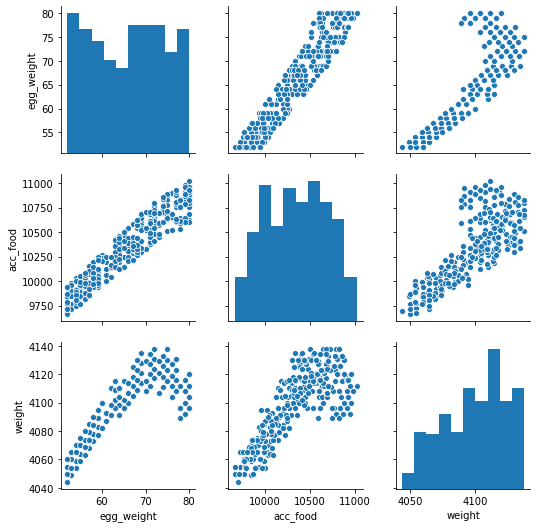

In [14]:
#상관관계 시각화
import seaborn as sns
sns.pairplot(w)

### 종란 무게와 누적 사료량은 닭의 몸무게와 선형으로 비례하다가 특정 구간에서 더 이상 비례하지 않고 꺾임
### 종란 무게나 누적 사료량이 많더라도 최종 성장한 닭의 몸무게가 계속해서 느는 것이 아니기 때문

### 7.1.3 데이터 분할

In [16]:
# x, y로 데이터셋 분할, ndarray 타입
x_data=w.iloc[:,0:2].values
y_data=w.iloc[:,2].values

In [17]:
# 데이터 셋 분할을 위한 함수 불러오기
from sklearn.model_selection import train_test_split

In [18]:
#훈련용과 테스트용 8:2로 분할 실시
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [19]:
#데이터 분할 후 행 수 확인
len(pd.DataFrame(x_train)), len(pd.DataFrame(x_test))

(240, 60)

### 7.1.4 신경망 구현

In [20]:
#MLP 알고리즘 수행을 위한 함수 불러오기
from sklearn.neural_network import MLPRegressor

In [22]:
#모델 구축 및 학습
model_mlp=MLPRegressor().fit(x_train, y_train)

In [23]:
#모델 파라미터 확인
model_mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [24]:
#예측값 생성
y_pred_mlp=model_mlp.predict(x_test)

In [25]:
#예측값 확인
y_pred_mlp

array([4013.44840613, 4089.10274817, 4304.19637536, 4280.88971838,
       4066.11372223, 4316.87165843, 4036.53619983, 4344.03152838,
       4013.44840613, 4144.56733102, 4107.51798803, 4216.19225232,
       4286.53090741, 4021.93151743, 4204.26674116, 4325.43220973,
       4255.82199879, 4078.74634978, 4137.73864353, 4072.27794885,
       4172.57574064, 3924.37688016, 4183.00957903, 4320.33538605,
       4272.92964467, 4249.1773901 , 4160.20463188, 4343.74868183,
       4170.39827923, 4291.5637478 , 3988.44466982, 4012.26090767,
       3975.28900468, 4031.98374151, 4215.00475386, 4141.90948754,
       4165.30145556, 4134.89672126, 4283.54756185, 4018.28371101,
       4131.43299363, 4031.1565296 , 4304.19637536, 3980.12430956,
       4219.27436563, 4325.45353749, 4244.58227625, 4055.39703728,
       4147.81219536, 4154.82496165, 3945.99432884, 4213.8946954 ,
       4408.50226012, 4049.71319274, 4112.35329291, 4355.27125092,
       4012.88271302, 4039.94381522, 4049.43034618, 4395.60811

### 7.1.5 회귀모델의 성능 평가

### 회귀모델의 성능을 평가하는 방법에는 결정계수(R^2), 오차(Error)가 있음
### 결정계수는 1에 가까울 수록, 오차 값이 작을 수록 모델의 성능이 뛰어남

In [26]:
#회귀 성능 지표 계산용 함수 불러오기 및 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
#squared=True 일 경우 MSE, False일 경우 RMSE
RMSE=mean_squared_error(y_test, y_pred_mlp, squared=False)
MAE=mean_absolute_error(y_test, y_pred_mlp)
R_squared=r2_score(y_test, y_pred_mlp)
RMSE, MAE, R_squared

#결정계수 값이 1에 가까울 수록 뛰어난 성능인데 음수가 나왔다는 것은 예측을 잘못했다는 뜻

(124.82967137854841, 98.0248629697891, -26.759099011756962)

### 7.1.6 딥 러닝
### 딥 러닝은 머신러닝의 한 분야로 다층 구조 형태의 신경망
### DNN, CNN, RNN이 가장 대표적임
### DNN은 주로 회귀, CNN은 이미지 분류, RNN은 필기 인식이나 음성 인식같이 앞뒤 순서가 있는 데이터 분석

### 7.1.7 H2O 활용 딥 러닝 구현 (회귀)
#### DNN 이외의 구조에는 적용 불가

In [32]:
# train, test 8:2로 나누기
from sklearn.model_selection import train_test_split
train, test = train_test_split(w, test_size=0.2)

In [33]:
#H2O 의존 패키지 설치
!pip install requests
!pip install tabulate
!pip install future

In [34]:
# H2O 패키지 설치
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest+stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest+stable_Py.html
  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=4023c404c1c11cde48de3a8f2a6561ebe6e0ca8f26c799f0dbd0705e1e7cea3d
  Stored in directory: C:\Users\dayti\AppData\Local\pip\Cache\wheels\a3\20\a4\53f72c38b1994450e107bb7b6386e69e6203224dd723508f48
Successfully built h2o


In [37]:
# H2O 패키지 실행
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 mins 23 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_dayti_4dfflm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.990 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [44]:
#훈련용 데이터 셋 H2O 전용 데이터 프레임으로 변환
hf_train=h2o.H2OFrame(train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [45]:
#테스트용 데이터 셋 H2O 전용 데이터 프레임으로 변환
hf_test=h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [46]:
hf_train.structure()

H2OFrame: 'Key_Frame__upload_810eb5a4dd00403c4f76a0ae142041b5.hex' 
Dimensions: 240 obs. of 3 variables
$ egg_weight :  num 55 52 71 58 68 64 69 67 62 63
$ acc_food   :  num 9910 9784 10709 10036 10408 10320 10685 10220 10142 10423
$ weight     :  num 4075 4060 4112 4090 4116 4104 4135 4105 4110 4109


In [47]:
hf_test.structure()

H2OFrame: 'Key_Frame__upload_af35f4cc4da4e850b141f2a6f38e4c0c.hex' 
Dimensions: 60 obs. of 3 variables
$ egg_weight :  num 57 77 54 59 77 77 57 75 80 69
$ acc_food   :  num 9982 10803 9858 10019 10757 10787 10143 10826 10944 10298
$ weight     :  num 4079 4131 4065 4095 4108 4123 4074 4138 4112 4114


In [50]:
#딥러닝 구현을 위한 함수 불러오기
from h2o.estimators import H2ODeepLearningEstimator

In [51]:
#모델 구축 및 학습
model_h2o=H2ODeepLearningEstimator().train(x=['egg_weight', 'acc_food'], y='weight', training_frame=hf_train)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


In [53]:
#모델 정보 확인
model_h2o

#입력층 layer는 1로, unit(노드)가 종란 무게와 누적 사료량으로 2개
#은닉층 layer는 2,3, unit이 200개씩이고 type은 활성화 함수를 뜻하며 기본 값으로ReLu가 지정되어 있음
#출력층 layer는 4, unit은 몸무게 하나이며 연속형 변수이기 때문에 type으로 linear가 지정됨

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1660629276340_1


Status of Neuron Layers: predicting weight, regression, gaussian distribution, Quadratic loss, 41,001 weights/biases, 488.6 KB, 2,400 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,2,Input,0.0,,,,,,,,,
1,,2,200,Rectifier,0.0,0.0,0.0,0.006665,0.00465,0.0,-0.009829,0.107409,0.467574,0.02497
2,,3,200,Rectifier,0.0,0.0,0.0,0.079491,0.186377,0.0,-0.00435,0.069947,0.992372,0.008983
3,,4,1,Linear,,0.0,0.0,0.010927,0.100591,0.0,-0.009398,0.082128,0.00238,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 176.13719020374523
RMSE: 13.271668704565572
MAE: 10.631862237948535
RMSLE: 0.0032331831801935495
Mean Residual Deviance: 176.13719020374523

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-08-16 15:02:02,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-08-16 15:02:03,0.681 sec,513 obs/sec,1.0,1,240.0,14.890516,221.727462,11.568575,0.635002
2,,2022-08-16 15:02:04,1.353 sec,2131 obs/sec,10.0,10,2400.0,13.271669,176.137190,10.631862,0.710051



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,egg_weight,1.000000,1.000000,0.528295
1,acc_food,0.892882,0.892882,0.471705


In [54]:
#모델 성능만 확인
model_h2o.model_performance()


#RMSE가 125에서 13으로 급격하게 줄음


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 176.13719020374523
RMSE: 13.271668704565572
MAE: 10.631862237948535
RMSLE: 0.0032331831801935495
Mean Residual Deviance: 176.13719020374523


In [55]:
#모델 성능 지표 R_squared 확인
model_h2o.r2()

#음수에서 0.71로 1에 많이 가까워짐

0.7100506294338134

In [56]:
# 예측값 생성
y_pred_h2o = model_h2o.predict(hf_test)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [57]:
y_pred_h2o.head()

predict
4082.87
4125.84
4071.45
4088.96
4126.35
4126.02
4089.61
4127.79
4122.35
4124.75


In [58]:
#테스트용 데이터 셋에 예측값 predict열로 추가
hf_result = hf_test.cbind(y_pred_h2o)

In [59]:
hf_result.head()

egg_weight,acc_food,weight,predict
57,9982,4079,4082.87
77,10803,4131,4125.84
54,9858,4065,4071.45
59,10019,4095,4088.96
77,10757,4108,4126.35
77,10787,4123,4126.02
57,10143,4074,4089.61
75,10826,4138,4127.79
80,10944,4112,4122.35
69,10298,4114,4124.75


In [60]:
#모듈 이용을 위해 h2oframe에서 ndarray로 변경
y_test2= hf_result[2].as_data_frame().values
y_pred_h2o=hf_result[3].as_data_frame().values

In [61]:
#회귀 성능 지표 계산용 함수 불러오기 및 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [62]:
#squared=True 일 경우 MSE, False일 경우 RMSE
RMSE=mean_squared_error(y_test2, y_pred_h2o, squared=False)
MAE=mean_absolute_error(y_test2, y_pred_h2o)
R_squared=r2_score(y_test2, y_pred_h2o)
RMSE, MAE, R_squared

(14.964319859199726, 12.81070478212918, 0.596671145552216)

## 7.2 분류

### 7.2.1 Keras 활용 딥 러닝 구현 (분류)

In [63]:
#tensorflow & keras 설치
!pip install tensorflow
!pip iinstall keras

ERROR: unknown command "iinstall" - maybe you meant "install"



In [66]:
#딥러닝용 함수 불러오기
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense

In [72]:
#실습용 데이터 불러오기
import pandas as pd
df_train = pd.read_csv('ch6-2_train.csv')
df_test = pd.read_csv('ch6-2_test.csv')

In [73]:
# 훈련, 테스트 셋 각각 x,y로 분할, ndarray 타입
x_train=df_train.iloc[:,0:3].values
y_train=df_train.iloc[:,3].values
x_test=df_test.iloc[:,0:3].values
y_test=df_test.iloc[:,3].values

In [74]:
#독립변수 분포 확인
df_test.describe()

,wing_length,tail_length,comb_height
count,60.000000,60.000000,60.000000
mean,237.983333,68.383333,34.066667
std,13.663624,3.527575,1.998870
min,211.000000,62.000000,30.000000
25%,228.750000,65.750000,33.000000
50%,238.500000,68.500000,34.000000
75%,250.000000,71.000000,35.000000
max,260.000000,74.000000,38.000000


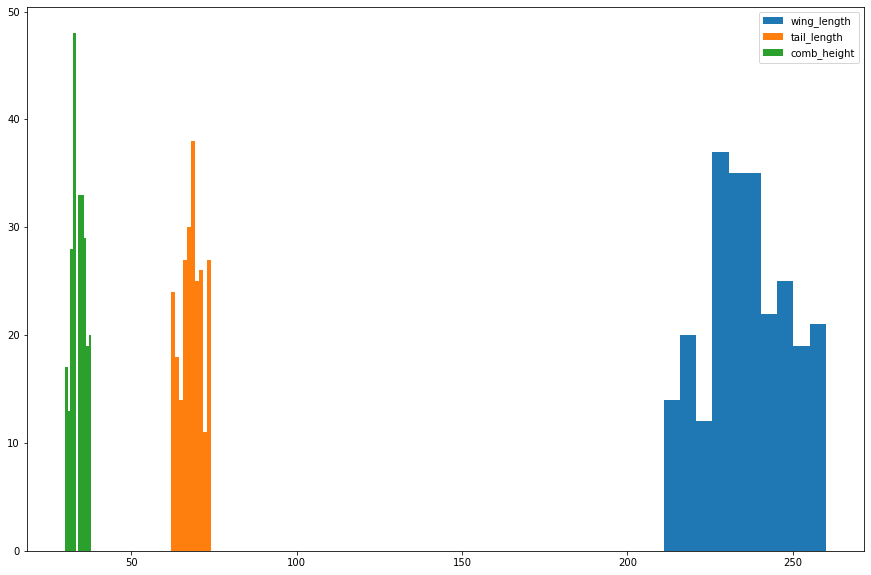

In [76]:
#히스토그램으로 독립변수 분포 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.hist(df_train.wing_length, label='wing_length')
plt.hist(df_train.tail_length, label='tail_length')
plt.hist(df_train.comb_height, label='comb_height')
plt.legend()
plt.show()

In [81]:
#스케일링하기 위한 함수 불러오기
from sklearn.preprocessing import MinMaxScaler

In [82]:
#x_train 데이터로 학습한 스케일러 생성
mms=MinMaxScaler().fit(x_train)

In [83]:
#스케일링
mm_x_train=mms.transform(x_train)
mm_x_test=mms.transform(x_test)

In [84]:
mm_x_train[0:5]

array([[0.55102041, 0.08333333, 0.5       ],
       [0.51020408, 0.41666667, 0.        ],
       [0.91836735, 0.25      , 0.5       ],
       [0.59183673, 0.08333333, 0.625     ],
       [0.71428571, 0.25      , 0.        ]])

In [86]:
#최소, 최대값 확인
mm_x_train.min(), mm_x_train.max()

(0.0, 1.0)

In [87]:
#종속변수 확인
y_train[0:5]

array(['a', 'a', 'a', 'a', 'a'], dtype=object)

In [88]:
#원핫인코딩
from sklearn.preprocessing import LabelBinarizer
# y_train 데이터로 학습한 라벨바이너리저 생성
lb = LabelBinarizer().fit(y_train)

In [89]:
#종속변수 a,b,c를 2진수로 원핫인코딩
o_y_train=lb.transform(y_train)
o_y_test=lb.transform(y_test)

In [90]:
#원핫인코딩 결과 확인
o_y_train

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [92]:
# 모델 구축
model = Sequential()
model.add(Input(3))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

'''
1. input: 입력층을 설정하는 레이어로 훈련용 데이터 셋의 독립변수가 3개이므로 3 입력
2. Dense : 은닉/출력층을 설정하는 레이어로 (units, activation)형태로 입력
3. units : 은닉층은 4의 배수를 사용하는 경우가 많으며, 
         출력층은 분류 문제에서는 종속변수의 라벨 개수만큼 설정하고 회귀 문제에서는 1로 지정
4. activation : 활성화 함수로 은닉층은 주로 relu, tanh을 사용하고 
                출력층은 이진 분류에서는 sigmoid, 다중 분류에서는 softmax, 회귀에서는 linear 또는 생략

'''

'\n1. input: 입력층을 설정하는 레이어로 훈련용 데이터 셋의 독립변수가 3개이므로 3 입력\n2. Dense : 은닉/출력층을 설정하는 레이어로 (units, activation)형태로 입력\n3. units : 은닉층은 4의 배수를 사용하는 경우가 많으며, \n         출력층은 분류 문제에서는 종속변수의 라벨 개수만큼 설정하고 회귀 문제에서는 1로 지정\n4. activation : 활성화 함수로 은닉층은 주로 relu, tanh을 사용하고 \n                출력층은 이진 분류에서는 sigmoid, 다중 분류에서는 softmax, 회귀에서는 linear 또는 생략\n\n'

In [93]:
#모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


In [95]:
#모델 학습 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

'''
1. loss : 손실 합수는 모델의 최적화에 사용되는 목적 함수로 
          이진 분류일 경우 바이너리, 다중 분류일 경우 카테고리컬, 회귀일 경우 mse, mae를 사용
2. optimizer : 손실 함수 값을 최소로 하는 가중치 최적값을 찾아가는 도구, 일반적으로 Adam이 높은 성능
3. metrics : 모델의 성능을 평가하는 지표로 분류 문제에서는 accuracy, 회귀 문제에서는 mse, mae, rmse 주로 사용
'''

'\n1. loss : 손실 합수는 모델의 최적화에 사용되는 목적 함수로 \n          이진 분류일 경우 바이너리, 다중 분류일 경우 카테고리컬, 회귀일 경우 mse, mae를 사용\n2. optimizer : 손실 함수 값을 최소로 하는 가중치 최적값을 찾아가는 도구, 일반적으로 Adam이 높은 성능\n3. metrics : 모델의 성능을 평가하는 지표로 분류 문제에서는 accuracy, 회귀 문제에서는 mse, mae, rmse 주로 사용\n'

In [97]:
#모델 학습 실시
history=model.fit(mm_x_train, o_y_train, epochs = 300, batch_size=16, validation_split=0.2)

'''
1. epochs : 학습 횟수
2. batch_size : 한 번에 학습할 데이터 크기
3. validation_split : 검증 데이터의 비율

'''

Epoch 1/300
12/12 [==============================] - 12s 42ms/step - loss: 1.0887 - accuracy: 0.4205 - val_loss: 1.0941 - val_accuracy: 0.2083
Epoch 2/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0506 - accuracy: 0.6308 - val_loss: 1.1415 - val_accuracy: 0.0000e+00
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0260 - accuracy: 0.7382 - val_loss: 1.1855 - val_accuracy: 0.0000e+00
Epoch 4/300
12/12 [==============================] - 0s 2ms/step - loss: 1.0067 - accuracy: 0.7404 - val_loss: 1.2134 - val_accuracy: 0.0000e+00
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.7489 - val_loss: 1.2513 - val_accuracy: 0.0000e+00
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 0.9329 - accuracy: 0.8224 - val_loss: 1.2920 - val_accuracy: 0.0000e+00
Epoch 7/300
12/12 [==============================] - 0s 2ms/step - loss: 0.8913 - accuracy: 0.8442 - val_loss: 1.3382 - val_accuracy

Epoch 116/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1083 - accuracy: 0.9697 - val_loss: 0.2980 - val_accuracy: 0.8750
Epoch 117/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9304 - val_loss: 0.3044 - val_accuracy: 0.8750
Epoch 118/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9461 - val_loss: 0.3333 - val_accuracy: 0.8542
Epoch 119/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9345 - val_loss: 0.3274 - val_accuracy: 0.8542
Epoch 120/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9539 - val_loss: 0.2811 - val_accuracy: 0.8958
Epoch 121/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9177 - val_loss: 0.2887 - val_accuracy: 0.8958
Epoch 122/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9540 - val_loss: 0.3178 - val_accuracy: 0.8750

12/12 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9234 - val_loss: 0.2799 - val_accuracy: 0.9167
Epoch 231/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9584 - val_loss: 0.2947 - val_accuracy: 0.8958
Epoch 232/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9598 - val_loss: 0.2741 - val_accuracy: 0.9167
Epoch 233/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9539 - val_loss: 0.2936 - val_accuracy: 0.9167
Epoch 234/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.9560 - val_loss: 0.2840 - val_accuracy: 0.9167
Epoch 235/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9462 - val_loss: 0.2959 - val_accuracy: 0.9167
Epoch 236/300
12/12 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9557 - val_loss: 0.2648 - val_accuracy: 0.9167
Epoch 237/300

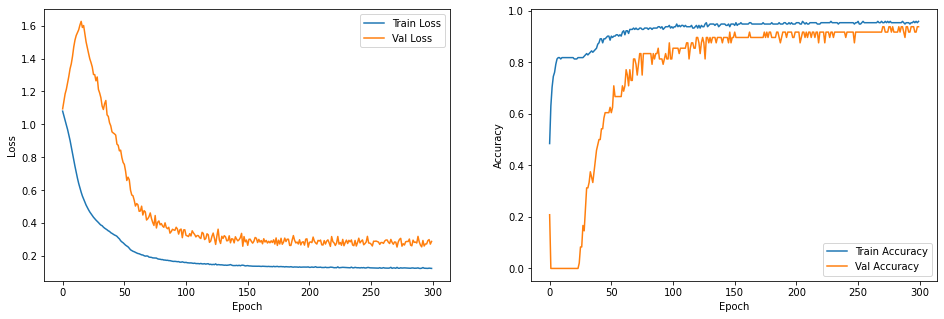

In [99]:
#학습 결과 그래프 표시
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

In [102]:
# 모델 훈련 성능 확인 (loss, accuaracy 순)
model.evaluate(mm_x_train, o_y_train)

8/8 [==============================] - 0s 1ms/step - loss: 0.1545 - accuracy: 0.9500


[0.15450172126293182, 0.949999988079071]

In [101]:
#모델 테스트 성능 확인
model.evaluate(mm_x_test, o_y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.2799 - accuracy: 0.9333


[0.27985888719558716, 0.9333333373069763]

In [103]:
#테스트용 데이터 셋 활용 예측값 생성
y_pred=model.predict(mm_x_test)

In [104]:
#예측값 확인
y_pred[0:5]

array([[9.9609154e-01, 3.0377464e-06, 3.9053455e-03],
       [9.9999666e-01, 1.1840291e-07, 3.1978045e-06],
       [9.9999821e-01, 5.9573938e-07, 1.1335245e-06],
       [9.9999666e-01, 1.4185287e-06, 1.9269519e-06],
       [9.9999976e-01, 1.4016557e-07, 1.2087983e-07]], dtype=float32)

In [105]:
#예측값 반올림
y_pred=y_pred.round()

In [106]:
#예측값 확인
y_pred[0:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [108]:
import numpy as np
#배열에서 열 기준 가장 큰 값의 인덱스 호출 및 배열 차원 축소
y_pred=np.argmax(y_pred, axis=1).reshape(-1)

In [109]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [110]:
#예측값 배열의 0을 a로, 1을 b로, 2를 c로 변경
condlist = [y_pred==0, y_pred==1, y_pred==2]
choicelist=['a','b','c']
y_pred = np.select(condlist, choicelist)

In [111]:
#변환된 예측값과 실제 값 확인
print(y_pred[0:5], y_test[0:5])

['a' 'a' 'a' 'a' 'a'] ['a' 'a' 'a' 'a' 'a']


In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  1, 19]], dtype=int64)

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



### 7.2.2 과적합을 줄이는 방법 (드롭 아웃)

In [115]:
from keras.layers import Dropout

In [117]:
#모델 구축
model_d=Sequential()
model_d.add(Input(3))
model_d.add(Dense(16, activation='relu'))
model_d.add(Dropout(0.4))
model_d.add(Dense(16, activation='relu'))
model_d.add(Dropout(0.4))
model_d.add(Dense(3, activation='softmax'))
model_d.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 51        
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________
